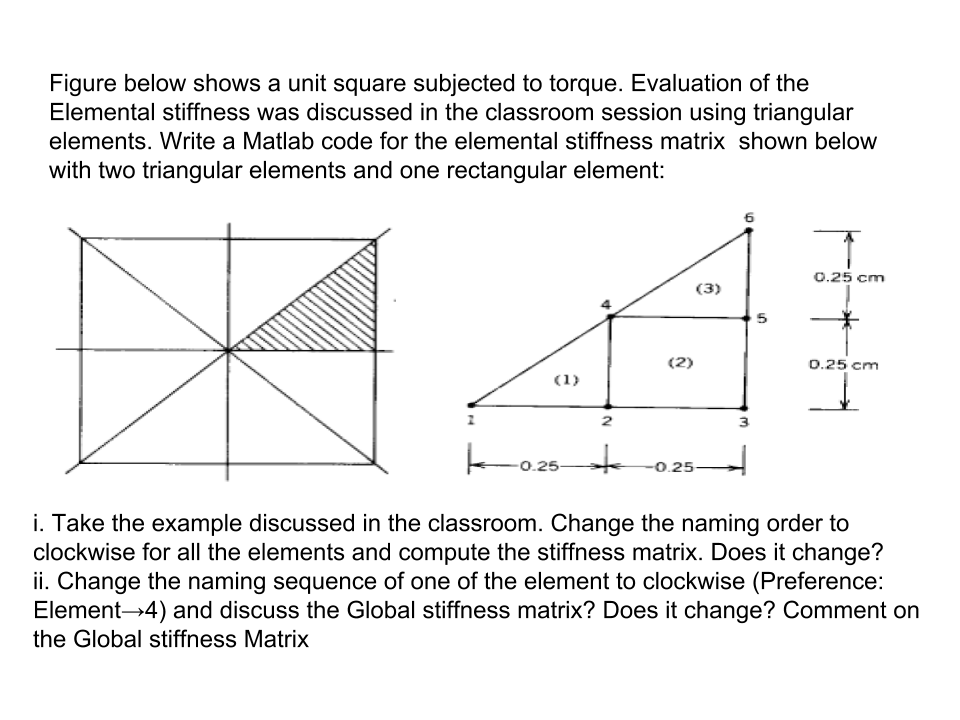

In [1]:
import sympy as sp
import numpy as np
from sympy import Matrix, zeros, init_printing, symbols, diff
from IPython.display import Image
display(Image("q4.png"))
init_printing(pretty_print = True)
X,Y = symbols('X Y')

#Current workflow:- Nodes -> Elements -> Stiffness Matrix -> ???? -> Solution.

class node: #Create a simple node, helps to keep track of what they are.
    def __init__(self, xCoord, yCoord):
        self.x = xCoord
        self.y = yCoord
        self.pos = [xCoord, yCoord]  

#The V2 architecture scheme uses arrays instead of letters schemes, which will make this more unreadable.
class element: #Create elements using nodes, triangles and quadilaterals both.
    def __init__(self, nodes = []):
        self.nodeList = [nodes[0], nodes[1], nodes[2]]
        try:
            self.nodeList.append(nodes[3])
        except:
            None
        self.stiffness = None
        
    @property
    def isTri(self): #Might help in futre debugging or execution?
        try: 
            if self.nodeList[3] == None: return False 
        except: return True

def setUpNodes(): #Sets up the node system. Can I make this visual?
    #n = input('How many nodes would you like to use?')
    x = [0,1,2,1,2,2]
    y = [0,0,0,1,1,2]
    nodes = []
    for i in range(len(x)): nodes.append(node(x[i],y[i]))
    return nodes
    
def triStiff(elem): #Spits out stiffness matrix for any triangular element. This seems to work.
    a,b,c=  [zeros(3,1) for i in range(3)]
    x,y = [],[]
    for node in elem.nodeList:
        x.append(node.x)
        y.append(node.y)
    A = Matrix([[1,1,1], x, y]).det() / 2
    for i in range(3):              
        b[i] = (y[(i+1)%3] - y[(i+2)%3])                    
        c[i] = (x[(i+2)%3] - x[(i+1)%3])                    
    k = Matrix(3,3, lambda i,j: b[i]*b[j] + c[i]*c[j]) / (4*A)
    return k

def rectStiff(elem): #Spits out stiffness matrix for any rectangular element. This is brute forced.
    a,b,c=  [zeros(4,1) for i in range(3)]
    x,y = [],[]
    A = 0
    for node in elem.nodeList:
        x.append(node.x)
        y.append(node.y)
    for i in range(4):
        A += (x[(i+1)%4]*y[(i+2)%4] - x[(i+2)%4]*y[(i+1)%4])
    #Note: A here actually twice the area, and so I put 3 below instead of 6.
    #No real reason apart from making the output readable.
    k = Matrix([[4, -1, -2, -1],[-1, 4, -1, -2],[-2, -1, 4, -1],[-1, -2, -1, 4]]) / (3*A)
    return k

def globalMatrix(elements, nodes): #Returns the global stiffness matrix using the elements and nodes.
    n = len(nodes)
    Kg = zeros(n,n)
    for element in elements: #This was some smart mapping here. But I don't really remember what.
        nodePos = []
        for node in element.nodeList: nodePos.append(nodes.index(node))
        for i in nodePos:
            for j in nodePos:
                Kg[i,j] += element.stiffness[nodePos.index(i),nodePos.index(j)]
    return Kg
nodes = setUpNodes()

In [3]:
def setUpElementsAC(nodes): #Sets up elements using nodes in anticlockwise.
    #e = input('How many elements would you like to use?')
    e = 3
    elements = []
    connections = [[nodes[0],nodes[1],nodes[3]],
           [nodes[1],nodes[2],nodes[4],nodes[3]],
           [nodes[3],nodes[4],nodes[5]]]
    for i in range(e): elements.append(element(connections[i]))
    return elements

elements = setUpElementsAC(nodes)
for elem in elements: 
    if elem.isTri == True: 
        elem.stiffness = triStiff(elem)
    else: 
        elem.stiffness = rectStiff(elem)
    print('Element: ', elements.index(elem)+1)
    display('Stiffness Matrix:',elem.stiffness)
    
Kg = globalMatrix(elements, nodes)
display('Global Stiffness Matrix:',Kg)
display('Global Stiffness Matrix x 6:',6*Kg)

Element:  1


'Stiffness Matrix:'

⎡1/2   -1/2   0  ⎤
⎢                ⎥
⎢-1/2   1    -1/2⎥
⎢                ⎥
⎣ 0    -1/2  1/2 ⎦

Element:  2


'Stiffness Matrix:'

⎡2/3   -1/6  -1/3  -1/6⎤
⎢                      ⎥
⎢-1/6  2/3   -1/6  -1/3⎥
⎢                      ⎥
⎢-1/3  -1/6  2/3   -1/6⎥
⎢                      ⎥
⎣-1/6  -1/3  -1/6  2/3 ⎦

Element:  3


'Stiffness Matrix:'

⎡1/2   -1/2   0  ⎤
⎢                ⎥
⎢-1/2   1    -1/2⎥
⎢                ⎥
⎣ 0    -1/2  1/2 ⎦

'Global Stiffness Matrix:'

⎡1/2   -1/2   0     0     0     0  ⎤
⎢                                  ⎥
⎢-1/2  5/3   -1/6  -2/3  -1/3   0  ⎥
⎢                                  ⎥
⎢ 0    -1/6  2/3   -1/3  -1/6   0  ⎥
⎢                                  ⎥
⎢ 0    -2/3  -1/3  5/3   -2/3   0  ⎥
⎢                                  ⎥
⎢ 0    -1/3  -1/6  -2/3  5/3   -1/2⎥
⎢                                  ⎥
⎣ 0     0     0     0    -1/2  1/2 ⎦

'Global Stiffness Matrix x 6:'

⎡3   -3  0   0   0   0 ⎤
⎢                      ⎥
⎢-3  10  -1  -4  -2  0 ⎥
⎢                      ⎥
⎢0   -1  4   -2  -1  0 ⎥
⎢                      ⎥
⎢0   -4  -2  10  -4  0 ⎥
⎢                      ⎥
⎢0   -2  -1  -4  10  -3⎥
⎢                      ⎥
⎣0   0   0   0   -3  3 ⎦

## When we set up nodes anticlockiwse, we get the above stiffness matrix.

In [8]:
def setUpElementsC(nodes): #Sets up elements using nodes in clockwise.
    e = 3
    elements = []
    connections = [[nodes[3],nodes[1],nodes[0]],
           [nodes[3],nodes[4],nodes[2],nodes[1]],
           [nodes[5],nodes[4],nodes[3]]]
    for i in range(e): elements.append(element(connections[i]))
    return elements

elements = setUpElementsC(nodes)
for elem in elements: 
    if elem.isTri == True: 
        elem.stiffness = triStiff(elem)
    else: 
        elem.stiffness = rectStiff(elem)
    #print('Element: ', elements.index(elem)+1)
    #display('Stiffness Matrix:',elem.stiffness)
    
Kg = globalMatrix(elements, nodes)
display('Global Stiffness Matrix:',Kg)
display('Global Stiffness Matrix x 6:',6*Kg)

'Global Stiffness Matrix:'

⎡-1/2  1/2    0     0     0     0  ⎤
⎢                                  ⎥
⎢1/2   -5/3  1/6   2/3   1/3    0  ⎥
⎢                                  ⎥
⎢ 0    1/6   -2/3  1/3   1/6    0  ⎥
⎢                                  ⎥
⎢ 0    2/3   1/3   -5/3  2/3    0  ⎥
⎢                                  ⎥
⎢ 0    1/3   1/6   2/3   -5/3  1/2 ⎥
⎢                                  ⎥
⎣ 0     0     0     0    1/2   -1/2⎦

'Global Stiffness Matrix x 6:'

⎡-3   3   0    0    0   0 ⎤
⎢                         ⎥
⎢3   -10  1    4    2   0 ⎥
⎢                         ⎥
⎢0    1   -4   2    1   0 ⎥
⎢                         ⎥
⎢0    4   2   -10   4   0 ⎥
⎢                         ⎥
⎢0    2   1    4   -10  3 ⎥
⎢                         ⎥
⎣0    0   0    0    3   -3⎦

## When we set up nodes clockiwse, we get the above stiffness matrix.
    It is the negative of the anticlockwise matrix.

In [11]:
def setUpElementsR(nodes): #Sets up elements using nodes and all triangles.
    e = 4
    elements = []
    connections = [[nodes[0],nodes[1],nodes[3]],
           [nodes[1],nodes[2],nodes[4]],
           [nodes[1],nodes[4],nodes[3]],
           [nodes[3],nodes[4],nodes[5]]]
    for i in range(e): elements.append(element(connections[i]))
    return elements

elements = setUpElementsR(nodes)
for elem in elements: 
    if elem.isTri == True: 
        elem.stiffness = triStiff(elem)
    else: 
        elem.stiffness = rectStiff(elem)
    #print('Element: ', elements.index(elem)+1)
    #display('Stiffness Matrix:',elem.stiffness)
    
Kg = globalMatrix(elements, nodes)
display('Global Stiffness Matrix:',Kg)
display('Global Stiffness Matrix x 6:',6*Kg)

'Global Stiffness Matrix:'

⎡1/2   -1/2   0    0    0     0  ⎤
⎢                                ⎥
⎢-1/2   2    -1/2  -1   0     0  ⎥
⎢                                ⎥
⎢ 0    -1/2   1    0   -1/2   0  ⎥
⎢                                ⎥
⎢ 0     -1    0    2    -1    0  ⎥
⎢                                ⎥
⎢ 0     0    -1/2  -1   2    -1/2⎥
⎢                                ⎥
⎣ 0     0     0    0   -1/2  1/2 ⎦

'Global Stiffness Matrix x 6:'

⎡3   -3  0   0   0   0 ⎤
⎢                      ⎥
⎢-3  12  -3  -6  0   0 ⎥
⎢                      ⎥
⎢0   -3  6   0   -3  0 ⎥
⎢                      ⎥
⎢0   -6  0   12  -6  0 ⎥
⎢                      ⎥
⎢0   0   -3  -6  12  -3⎥
⎢                      ⎥
⎣0   0   0   0   -3  3 ⎦

## This the matrix using four triangles, all anticlockwise.

In [10]:
def setUpElementsR(nodes): #Sets up elements using nodes in anticlockwise except for the last one.
    e = 4
    elements = []
    connections = [[nodes[0],nodes[1],nodes[3]],
           [nodes[1],nodes[2],nodes[4]],
           [nodes[1],nodes[4],nodes[3]],
           [nodes[5],nodes[4],nodes[3]]]
    for i in range(e): elements.append(element(connections[i]))
    return elements

elements = setUpElementsR(nodes)
for elem in elements: 
    if elem.isTri == True: 
        elem.stiffness = triStiff(elem)
    else: 
        elem.stiffness = rectStiff(elem)
    #print('Element: ', elements.index(elem)+1)
    #display('Stiffness Matrix:',elem.stiffness)
    
Kg = globalMatrix(elements, nodes)
display('Global Stiffness Matrix:',Kg)
display('Global Stiffness Matrix x 6:',6*Kg)

'Global Stiffness Matrix:'

⎡1/2   -1/2   0    0    0     0  ⎤
⎢                                ⎥
⎢-1/2   2    -1/2  -1   0     0  ⎥
⎢                                ⎥
⎢ 0    -1/2   1    0   -1/2   0  ⎥
⎢                                ⎥
⎢ 0     -1    0    1    0     0  ⎥
⎢                                ⎥
⎢ 0     0    -1/2  0    0    1/2 ⎥
⎢                                ⎥
⎣ 0     0     0    0   1/2   -1/2⎦

'Global Stiffness Matrix x 6:'

⎡3   -3  0   0   0   0 ⎤
⎢                      ⎥
⎢-3  12  -3  -6  0   0 ⎥
⎢                      ⎥
⎢0   -3  6   0   -3  0 ⎥
⎢                      ⎥
⎢0   -6  0   6   0   0 ⎥
⎢                      ⎥
⎢0   0   -3  0   0   3 ⎥
⎢                      ⎥
⎣0   0   0   0   3   -3⎦

## This the matrix using four triangles, all anticlockwise, except for the last element as clockwise.
    The matrix is wrong.